In [53]:
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [54]:
#pandas used for data manipulation
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

#seaborn is used to create visualization
import seaborn as sb

In [55]:
#this is loaded in a pandas dataframe in memory
data = pd.read_csv('uber-raw-data-apr14.csv')

In [56]:
data.shape

(564516, 4)

In [57]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [58]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [59]:
data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [60]:
uber['Date/Time']
#this is a string
#but it should be in a date-time format that Python understands

0        2014-04-01 00:11:00
1        2014-04-01 00:17:00
2        2014-04-01 00:21:00
3        2014-04-01 00:28:00
4        2014-04-01 00:33:00
5        2014-04-01 00:33:00
6        2014-04-01 00:39:00
7        2014-04-01 00:45:00
8        2014-04-01 00:55:00
9        2014-04-01 01:01:00
10       2014-04-01 01:19:00
11       2014-04-01 01:48:00
12       2014-04-01 01:49:00
13       2014-04-01 02:11:00
14       2014-04-01 02:25:00
15       2014-04-01 02:31:00
16       2014-04-01 02:43:00
17       2014-04-01 03:22:00
18       2014-04-01 03:35:00
19       2014-04-01 03:35:00
20       2014-04-01 03:41:00
21       2014-04-01 04:11:00
22       2014-04-01 04:15:00
23       2014-04-01 04:19:00
24       2014-04-01 04:20:00
25       2014-04-01 04:26:00
26       2014-04-01 04:27:00
27       2014-04-01 04:38:00
28       2014-04-01 04:47:00
29       2014-04-01 04:49:00
                 ...        
564486   2014-04-30 22:25:00
564487   2014-04-30 22:25:00
564488   2014-04-30 22:25:00
564489   2014-

In [61]:
#take a piece of Date/Time
dt = '4/30/2014 23:15:00'

#split it into date and time using 'split' function seperated by ' '
d, t = dt.split(' ')

#print date(d) and time(t) 
print(d)
print(t)

4/30/2014
23:15:00


In [62]:
m,d,y  = d.split('/')
print(m)
print(d)
print(y)

4
30
2014


In [63]:
d

'30'

In [64]:
#converting Date/Time from string to DateTime format
dt = pd.to_datetime(dt)
dt

Timestamp('2014-04-30 23:15:00')

In [65]:
dt.day_name

<bound method Timestamp.day_name of Timestamp('2014-04-30 23:15:00')>

In [66]:
dt.dayofweek
dt.daysinmonth
#after dt. use tab to explore more options that can be used with DateTime Format

30

In [67]:
#converting data to appropriate Date/Time Format
#'map' will apply the function pd.to_datetime to all the elements of 'Date/Time'

data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [71]:
#checking if the data has changed into TimeStamp for first row of data 
data['Date/Time'][0]

Timestamp('2014-04-01 00:11:00')

In [77]:
#get day of month
def get_dom(dt):
    return dt.day

#map applies a function to the entire list
data['dom'] = data['Date/Time'].map(get_dom)


In [81]:
def get_weekday(dt):
    return dt.day

data['weekday'] = data['Date/Time'].map(get_weekdaykday)

In [83]:
def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

In [85]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,30,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,30,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,30,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,30,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,30,23


## Data Analysis

### Analysis of DoM

(array([52721., 59680., 52581., 58631., 45427., 56764., 38781., 60673.,
        64697., 74561.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

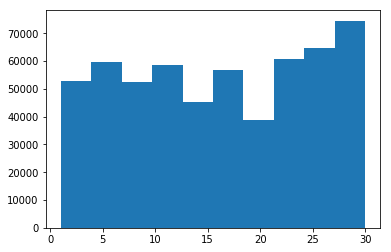

In [86]:
#we can create a histogram of a numbric data by default
#by default, it will make 10 bins

hist(data.dom)

Text(0.5, 1.0, 'Frequency by DoM Uber Data')

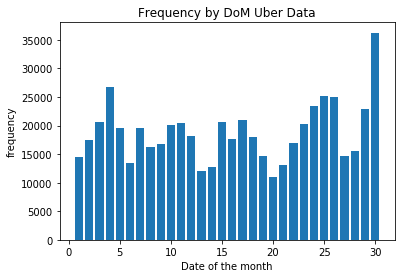

In [93]:
hist(data.dom, bins=30, rwidth=0.8, range=(0.5, 30.5))
xlabel('Date of the month')
ylabel('frequency')
title('Frequency by DoM Uber Data')

In [100]:
#The len() function returns the number of items in an object. 
#When the object is a string, the len() function returns the number of characters in the string.

#the following command get the number of items in a group of dom
for k, rows in data.groupby('dom'):
    print (k, len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [103]:
#we can do that by defining a function

def count_rows(rows):
    return len(rows) 
    
by_date = data.groupby('dom').apply(count_rows)
by_date
#gives the number of records per day of the month

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

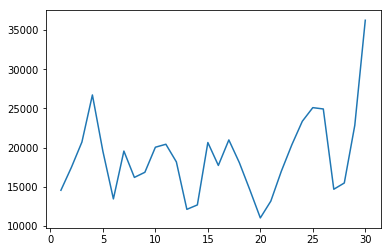

In [104]:
plot(by_date)

<BarContainer object of 30 artists>

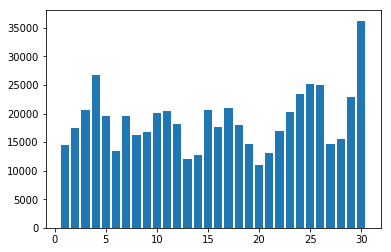

In [106]:
bar(range(1,31), by_date)

In [108]:
#sorting the above result by values

by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

([<matplotlib.axis.XTick at 0x1b5eabce390>,
 <a list of 30 Text xticklabel objects>)

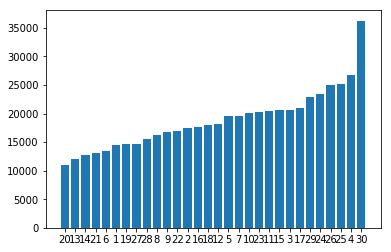

In [110]:
#then we can plot with sorted data

bar(range(1,31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)

''

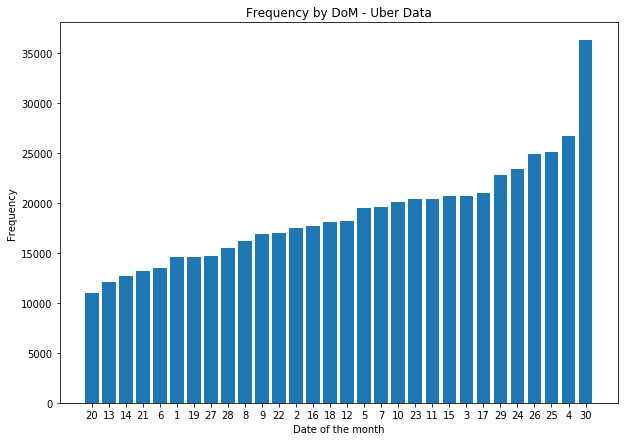

In [120]:
#the above plot brings a lot of value above the plot that might not be desired
#just put a ; at the end of the plot command to avoid that

bar(range(1,31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
figsize(10,7)
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by DoM - Uber Data')
;

### Analysis by Hour

(array([ 24614.,  11135.,  27974.,  65706.,  36639.,  42028., 104517.,
         88478.,  75167.,  88258.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

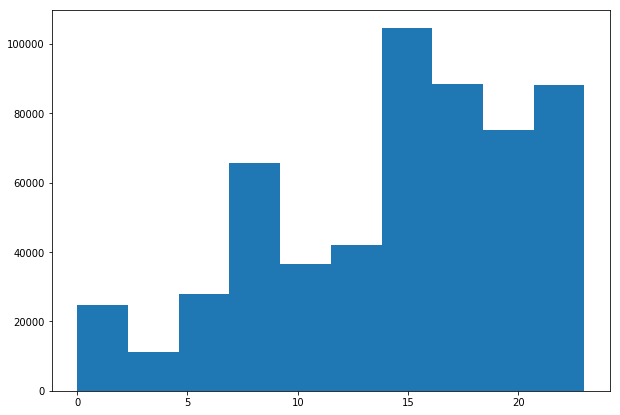

In [121]:
hist(data.hour)